In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [0]:
help(make_blobs
    )

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers

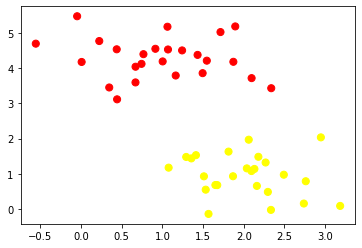

In [0]:
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.show()

(-1.0, 3.5)

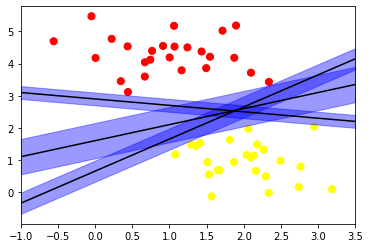

In [0]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
for m,b,d in[(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
  yfit=m*xfit+b
  plt.plot(xfit,yfit,'k')
  plt.fill_between(xfit,yfit-d,yfit+d,color='b',alpha=0.4)

plt.xlim(-1,3.5)

In [0]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1)

In [0]:
model.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#plot the decision function
def plot_svc_decision_function(model,ax=None,plot_support=True):
  if ax is None:
    ax=plt.gca()
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()

  x=np.linspace(xlim[0],xlim[1],30)
  y=np.linspace(ylim[0],ylim[1],30)
  Y,X=np.meshgrid(y,x)
  xy=np.vstack([X.ravel(),Y.ravel()]).T
  P=model.decision_function(xy).reshape(X.shape)

  ax.contour(X,Y,P,color='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=5,facecolors=None)

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

              

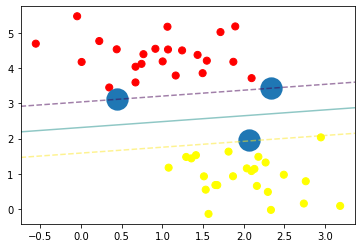

In [0]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [0]:
import pandas as pd
import seaborn as sns


In [0]:
d=pd.read_csv("winequality.csv")
d.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
d.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

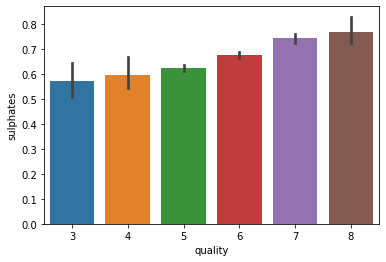

In [0]:
#quality vs sulphates
sns.barplot(x="quality",y="sulphates",data=d)
plt.show()

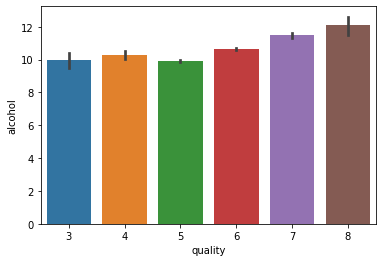

In [0]:
sns.barplot(x="quality",y="alcohol",data=d)
plt.show()

In [0]:
d['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
#pandas cut func is used to segment anf sort the data into bins
bins=(2,6,8)
group_names=['bad','good']
categories=pd.cut(d['quality'],bins,labels=group_names)
d['quality']=categories

In [0]:
d['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

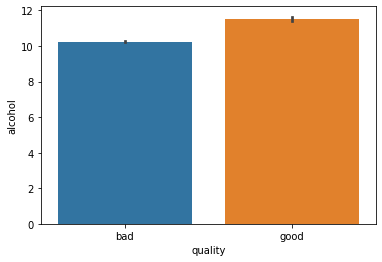

In [0]:
sns.barplot(x="quality",y="alcohol",data=d)#more alcohol means red wine
plt.show()

In [0]:
X=d.drop(['quality'],axis=1)
y=d['quality']

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [0]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [0]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.90625

In [0]:
#gridsearch for best model and parameters
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100],'kernel':['linear']},{'C':[1,10,100],'kernel':['rbf']},{'gamma':[0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=-1)
grid_search.fit(X_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_

In [0]:
best_parameters

{'gamma': 0.9}

In [0]:
classifier=SVC(kernel='rbf',gamma=0.9)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.90625